In [7]:
gpuConfig = tf.compat.v1.ConfigProto(
    gpu_options= tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.5),
    device_count={'GPU': 4})
# with tf.Session(config=gpuConfig) as session:

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
mirrored_strategy = tf.distribute.MirroredStrategy()

Num GPUs Available:  10
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1', '/job:localhost/replica:0/task:0/device:GPU:2', '/job:localhost/replica:0/task:0/device:GPU:3', '/job:localhost/replica:0/task:0/device:GPU:4', '/job:localhost/replica:0/task:0/device:GPU:5', '/job:localhost/replica:0/task:0/device:GPU:6', '/job:localhost/replica:0/task:0/device:GPU:7', '/job:localhost/replica:0/task:0/device:GPU:8', '/job:localhost/replica:0/task:0/device:GPU:9')


In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import models, layers, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path_data = '../data/res_data/'
# path_data = '../data/augumented_dataset/'
path_train = path_data+'train/'
path_val = path_data+'test/'

num_l_train = len(os.listdir(path_train+'left'))
num_r_train = len(os.listdir(path_train+'right'))

num_l_val = len(os.listdir(path_val+'right'))
num_r_val = len(os.listdir(path_val+'left'))

total_train = num_l_train + num_r_train
total_val = num_l_val + num_r_val

In [5]:
# batch_size = 128
batch_size = 32
epochs = 10
IMG_HEIGHT = 32
IMG_WIDTH = 32

In [6]:
train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ
validation_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ
predict_image_generator = ImageDataGenerator(rescale=1./255) # 予測データのジェネレータ

In [7]:
train_data_gen = train_image_generator.flow_from_directory(directory=path_train,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2286 images belonging to 2 classes.


In [8]:
val_data_gen = validation_image_generator.flow_from_directory(directory=path_val,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 764 images belonging to 2 classes.


In [176]:
predict_data_gen = predict_image_generator.flow_from_directory(directory=path_data+'natural_img2/',
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                               batch_size=1636,
                                                               shuffle=False,
                                                              class_mode='categorical')

Found 1636 images belonging to 1 classes.


In [11]:
path_val

'../data/dataset/test/'

In [12]:
!ls ../data/dataset/natural/

ls: cannot access '../data/dataset/natural/': No such file or directory


In [13]:
input_tensor = Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3))
base_model = tf.keras.applications.ResNet50(
    include_top=False, weights='imagenet', input_tensor=input_tensor, pooling='avg'
)

94773248/94765736 [==============================] - 41s 0us/step


In [14]:
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(1, activation='sigmoid'))


In [15]:
model = models.Model(inputs=base_model.input, outputs=top_model(base_model.output))

In [16]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

Epoch 1/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0261 - accuracy: 0.9920 - val_loss: 0.0423 - val_accuracy: 0.9837
Epoch 2/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0168 - accuracy: 0.9938 - val_loss: 0.0555 - val_accuracy: 0.9810
Epoch 3/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0146 - accuracy: 0.9960 - val_loss: 0.1062 - val_accuracy: 0.9592
Epoch 4/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0211 - accuracy: 0.9938 - val_loss: 0.0502 - val_accuracy: 0.9851
Epoch 5/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0136 - accuracy: 0.9960 - val_loss: 0.0945 - val_accuracy: 0.9674
Epoch 6/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0288 - accuracy: 0.9898 - val_loss: 0.1591 - val_accuracy: 0.9212
Epoch 7/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0482 - val_accuracy: 0.9823
Epoch 8/10
71

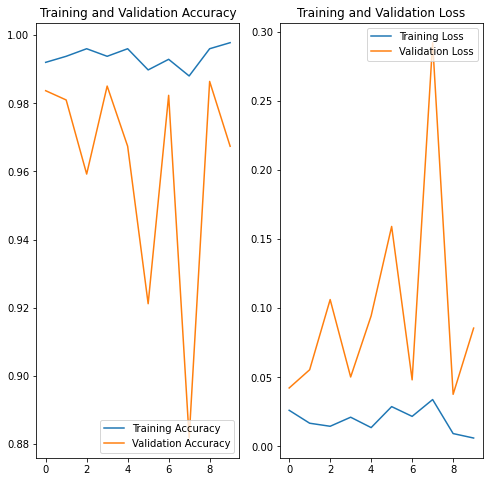

Epoch 1/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0678 - val_accuracy: 0.9755
Epoch 2/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 0.0837 - val_accuracy: 0.9810
Epoch 3/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.0482 - val_accuracy: 0.9823
Epoch 4/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0389 - accuracy: 0.9845 - val_loss: 2.5644 - val_accuracy: 0.8791
Epoch 5/10
71/71 [==============================] - 3s 47ms/step - loss: 0.0449 - accuracy: 0.9880 - val_loss: 1.5124 - val_accuracy: 0.9851
Epoch 6/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0314 - accuracy: 0.9907 - val_loss: 0.1138 - val_accuracy: 0.9565
Epoch 7/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0126 - accuracy: 0.9965 - val_loss: 0.0543 - val_accuracy: 0.9810
Epoch 8/10
71

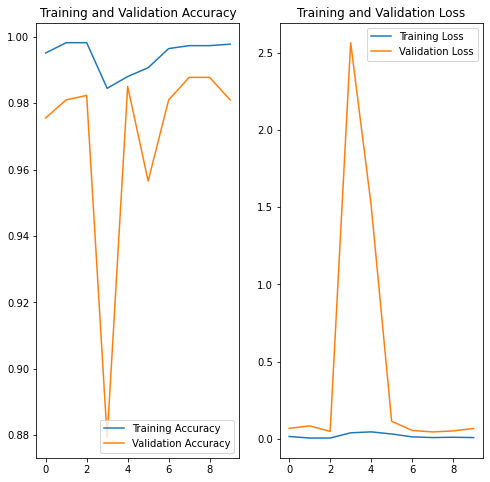

Epoch 1/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0555 - val_accuracy: 0.9837
Epoch 2/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0161 - accuracy: 0.9942 - val_loss: 0.0933 - val_accuracy: 0.9715
Epoch 3/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0381 - accuracy: 0.9894 - val_loss: 0.0368 - val_accuracy: 0.9891
Epoch 4/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.3740 - val_accuracy: 0.8492
Epoch 5/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0459 - val_accuracy: 0.9851
Epoch 6/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0473 - val_accuracy: 0.9878
Epoch 7/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0535 - val_accuracy: 0.9878
Epoch 8/10
71

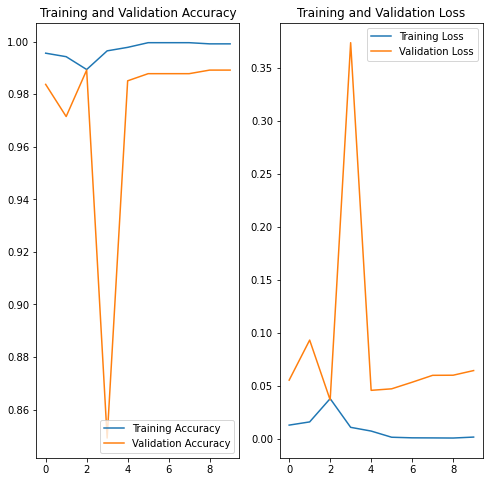

Epoch 1/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0079 - accuracy: 0.9973 - val_loss: 0.0906 - val_accuracy: 0.9837
Epoch 2/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0409 - accuracy: 0.9898 - val_loss: 0.0399 - val_accuracy: 0.9891
Epoch 3/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0325 - accuracy: 0.9902 - val_loss: 0.1359 - val_accuracy: 0.9552
Epoch 4/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0189 - accuracy: 0.9929 - val_loss: 0.0248 - val_accuracy: 0.9932
Epoch 5/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0127 - accuracy: 0.9973 - val_loss: 0.0771 - val_accuracy: 0.9728
Epoch 6/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0309 - accuracy: 0.9894 - val_loss: 0.9951 - val_accuracy: 0.6250
Epoch 7/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0541 - accuracy: 0.9849 - val_loss: 1.6528 - val_accuracy: 0.9090
Epoch 8/10
71

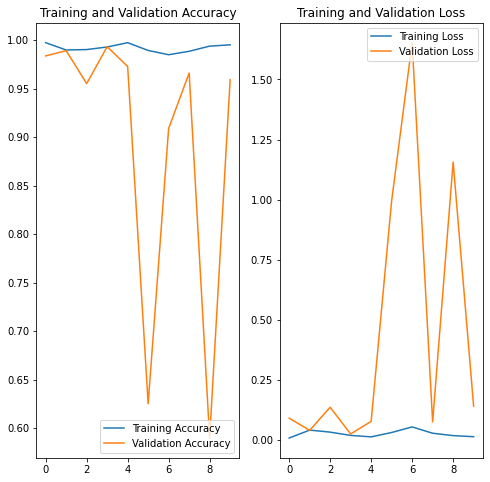

Epoch 1/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0101 - accuracy: 0.9978 - val_loss: 0.0527 - val_accuracy: 0.9918
Epoch 2/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0064 - accuracy: 0.9973 - val_loss: 0.0300 - val_accuracy: 0.9905
Epoch 3/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0723 - val_accuracy: 0.9810
Epoch 4/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.7047 - val_accuracy: 0.8207
Epoch 5/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0232 - accuracy: 0.9920 - val_loss: 0.0375 - val_accuracy: 0.9878
Epoch 6/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.0350 - val_accuracy: 0.9932
Epoch 7/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0130 - accuracy: 0.9960 - val_loss: 0.0235 - val_accuracy: 0.9918
Epoch 8/10
71

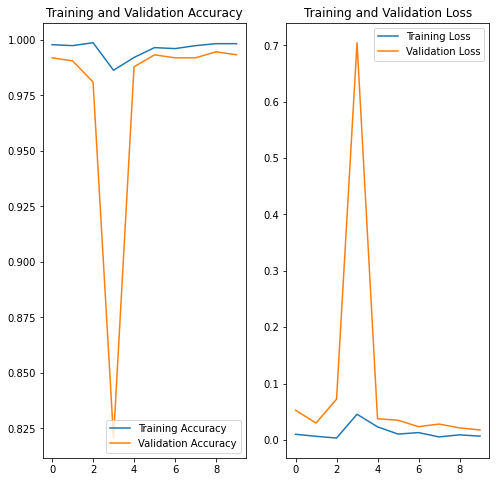

Epoch 1/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0059 - accuracy: 0.9969 - val_loss: 0.0377 - val_accuracy: 0.9878
Epoch 2/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0114 - accuracy: 0.9960 - val_loss: 0.0433 - val_accuracy: 0.9864
Epoch 3/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0026 - accuracy: 0.9987 - val_loss: 0.0215 - val_accuracy: 0.9918
Epoch 4/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0035 - accuracy: 0.9982 - val_loss: 0.0125 - val_accuracy: 0.9973
Epoch 5/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0129 - val_accuracy: 0.9973
Epoch 6/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0014 - accuracy: 0.9991 - val_loss: 0.0133 - val_accuracy: 0.9946
Epoch 7/10
71/71 [==============================] - 3s 45ms/step - loss: 7.6108e-04 - accuracy: 0.9996 - val_loss: 0.0087 - val_accuracy: 0.9986
Epoch 8/1

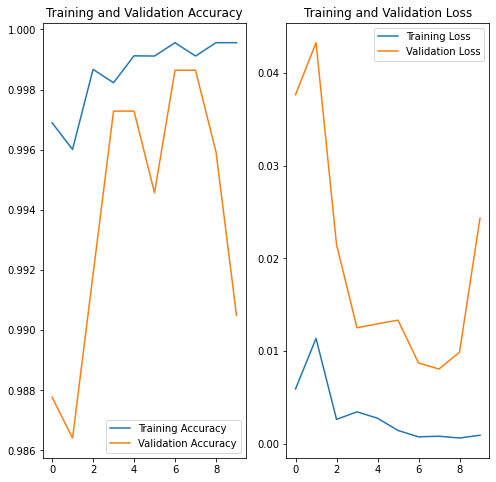

Epoch 1/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0375 - accuracy: 0.9894 - val_loss: 0.1908 - val_accuracy: 0.9647
Epoch 2/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0247 - accuracy: 0.9929 - val_loss: 0.0995 - val_accuracy: 0.9484
Epoch 3/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0169 - accuracy: 0.9929 - val_loss: 1.8495 - val_accuracy: 0.5584
Epoch 4/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0251 - val_accuracy: 0.9932
Epoch 5/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.1100 - val_accuracy: 0.9565
Epoch 6/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0685 - accuracy: 0.9791 - val_loss: 7.5563 - val_accuracy: 0.9457
Epoch 7/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0394 - accuracy: 0.9862 - val_loss: 0.0484 - val_accuracy: 0.9823
Epoch 8/10
71

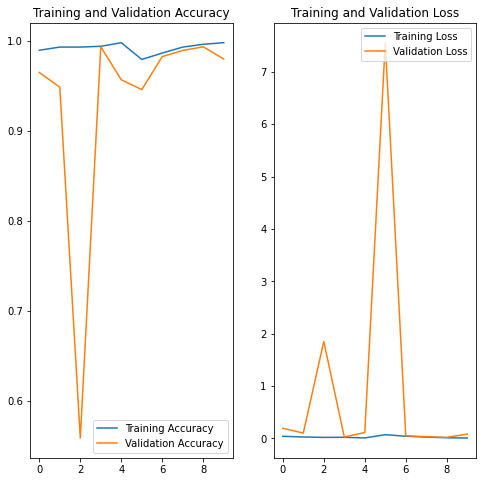

Epoch 1/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0795 - val_accuracy: 0.9769
Epoch 2/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.3043 - val_accuracy: 0.9266
Epoch 3/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0193 - accuracy: 0.9929 - val_loss: 0.0183 - val_accuracy: 0.9959
Epoch 4/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0129 - accuracy: 0.9965 - val_loss: 0.0264 - val_accuracy: 0.9918
Epoch 5/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0069 - accuracy: 0.9973 - val_loss: 0.0457 - val_accuracy: 0.9823
Epoch 6/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.0556 - val_accuracy: 0.9851
Epoch 7/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0140 - accuracy: 0.9969 - val_loss: 0.0287 - val_accuracy: 0.9891
Epoch 8/10
71

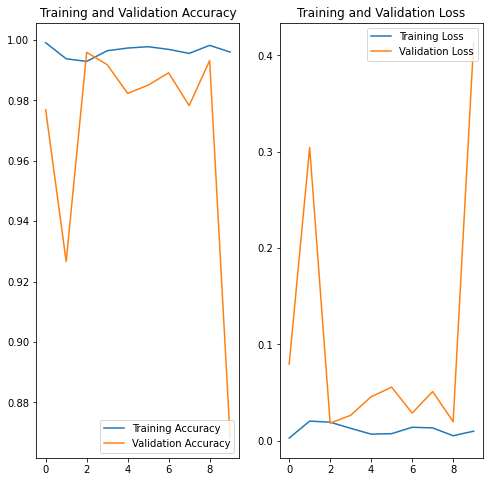

Epoch 1/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0083 - accuracy: 0.9960 - val_loss: 0.1175 - val_accuracy: 0.9592
Epoch 2/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0078 - accuracy: 0.9969 - val_loss: 0.1746 - val_accuracy: 0.9674
Epoch 3/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.1314 - val_accuracy: 0.9484
Epoch 4/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.1299 - val_accuracy: 0.9552
Epoch 5/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0045 - accuracy: 0.9996 - val_loss: 0.0318 - val_accuracy: 0.9918
Epoch 6/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0241 - val_accuracy: 0.9918
Epoch 7/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0181 - val_accuracy: 0.9946
Epoch 8/10
71

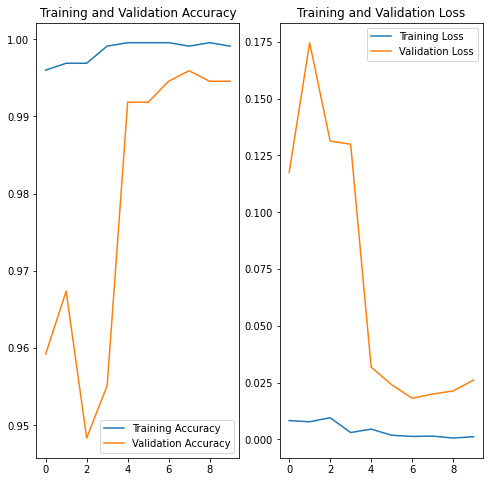

Epoch 1/10
71/71 [==============================] - 3s 47ms/step - loss: 6.9985e-04 - accuracy: 0.9996 - val_loss: 0.0236 - val_accuracy: 0.9946
Epoch 2/10
71/71 [==============================] - 3s 45ms/step - loss: 7.8091e-04 - accuracy: 0.9991 - val_loss: 0.0244 - val_accuracy: 0.9946
Epoch 3/10
71/71 [==============================] - 3s 45ms/step - loss: 8.3506e-04 - accuracy: 0.9996 - val_loss: 0.0254 - val_accuracy: 0.9946
Epoch 4/10
71/71 [==============================] - 3s 46ms/step - loss: 7.0548e-04 - accuracy: 0.9996 - val_loss: 0.0269 - val_accuracy: 0.9918
Epoch 5/10
71/71 [==============================] - 3s 45ms/step - loss: 5.4617e-04 - accuracy: 0.9996 - val_loss: 0.0267 - val_accuracy: 0.9918
Epoch 6/10
71/71 [==============================] - 3s 47ms/step - loss: 6.3064e-04 - accuracy: 0.9996 - val_loss: 0.0290 - val_accuracy: 0.9918
Epoch 7/10
71/71 [==============================] - 3s 46ms/step - loss: 7.7561e-04 - accuracy: 0.9996 - val_loss: 0.0251 - val_ac

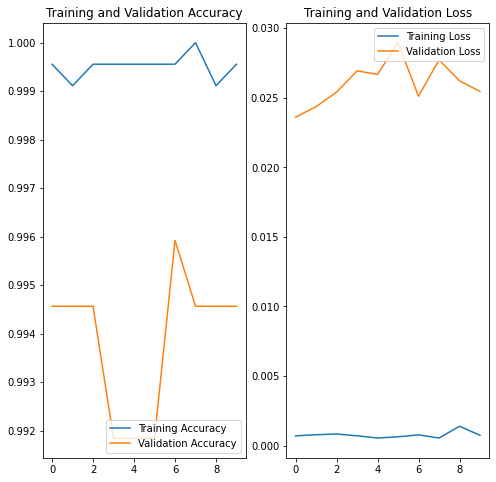

36.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [206]:
%%timeit -r 1 -n 10

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

sample_pred_images, _ = next(predict_data_gen)

list_ = sorted(os.listdir(path_data+'natural_img2/natural2'))[:]
# len(list_)
# model = tf.keras.models.load_model('../data/weight/resnet50.h5')

pred = model.predict(sample_pred_images, batch_size=None, verbose=0, steps=None)

preds = [0 if pred_ < 0.5 else 1 for pred_ in pred]

preds = np.vstack((list_, preds))

dic_pred = dict([(fname, int(pred)) for fname, pred in zip(preds[0,:], preds[1,:])])

import pandas as pd
df = pd.read_csv('../data/flower_natural_with_label2.csv')
# df['label_'] = [0 if label == 'r' else 1 for label in df['label']]
# df.to_csv('../data/flower_natural_with_label2.csv',index = False)

dic_label = dict([(fname, label) for fname, label in zip(df['fname'], df['label_'])])

l = []
cnt = 0
for fname in df['fname']:
    if dic_label[fname] != '-':
        cnt += 1
        l.append(dic_pred[fname] == dic_label[fname])
# print(l.count(True), cnt)
with open('../data/result_natural2(acc).txt', mode='a') as f:
        f.write(str(1 - (l.count(True)/ cnt)) + ',')

In [207]:
predict_data_gen = predict_image_generator.flow_from_directory(directory=path_data+'natural_img/',
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                               batch_size=1636,
                                                               shuffle=False,
                                                              class_mode='categorical')

Found 1636 images belonging to 1 classes.


Epoch 1/10
71/71 [==============================] - 3s 47ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0165 - val_accuracy: 0.9946
Epoch 2/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0190 - val_accuracy: 0.9946
Epoch 3/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0253 - val_accuracy: 0.9946
Epoch 4/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0209 - val_accuracy: 0.9946
Epoch 5/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0011 - accuracy: 0.9991 - val_loss: 0.0248 - val_accuracy: 0.9932
Epoch 6/10
71/71 [==============================] - 3s 45ms/step - loss: 8.6331e-04 - accuracy: 0.9996 - val_loss: 0.0176 - val_accuracy: 0.9918
Epoch 7/10
71/71 [==============================] - 3s 45ms/step - loss: 8.5388e-04 - accuracy: 0.9996 - val_loss: 0.0221 - val_accuracy: 0.9932
Epoch

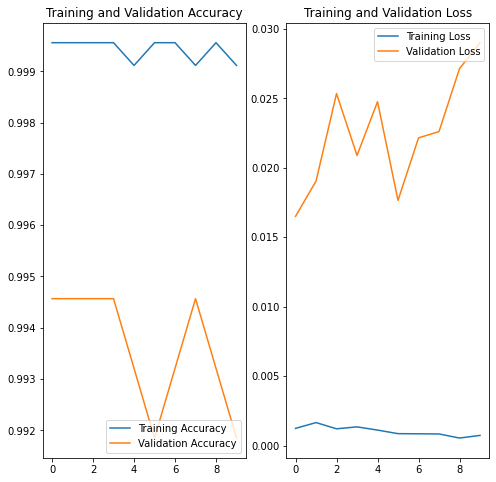

Epoch 1/10
71/71 [==============================] - 3s 47ms/step - loss: 2.6193e-04 - accuracy: 1.0000 - val_loss: 0.0320 - val_accuracy: 0.9932
Epoch 2/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0549 - val_accuracy: 0.9918
Epoch 3/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0600 - val_accuracy: 0.9891
Epoch 4/10
71/71 [==============================] - 3s 46ms/step - loss: 7.2556e-04 - accuracy: 1.0000 - val_loss: 0.0405 - val_accuracy: 0.9918
Epoch 5/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0071 - accuracy: 0.9978 - val_loss: 0.0271 - val_accuracy: 0.9905
Epoch 6/10
71/71 [==============================] - 3s 46ms/step - loss: 4.7803e-04 - accuracy: 1.0000 - val_loss: 0.0301 - val_accuracy: 0.9946
Epoch 7/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0147 - accuracy: 0.9938 - val_loss: 1.8900 - val_accuracy: 0.6658
E

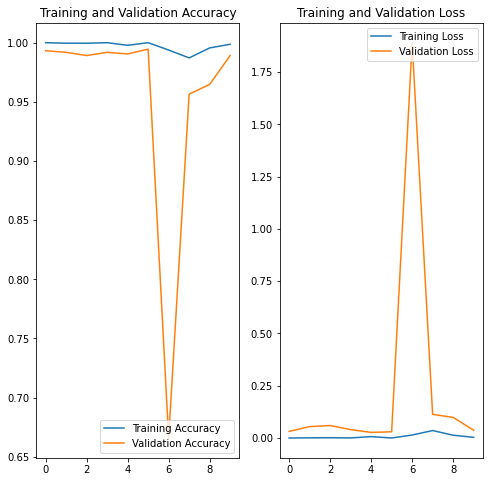

Epoch 1/10
71/71 [==============================] - 3s 47ms/step - loss: 7.1566e-04 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 0.9905
Epoch 2/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0178 - accuracy: 0.9929 - val_loss: 0.0341 - val_accuracy: 0.9878
Epoch 3/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0118 - accuracy: 0.9973 - val_loss: 0.0447 - val_accuracy: 0.9796
Epoch 4/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0517 - val_accuracy: 0.9891
Epoch 5/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 0.0480 - val_accuracy: 0.9823
Epoch 6/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0097 - accuracy: 0.9956 - val_loss: 0.0615 - val_accuracy: 0.9810
Epoch 7/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0329 - val_accuracy: 0.9905
Epoch 8/1

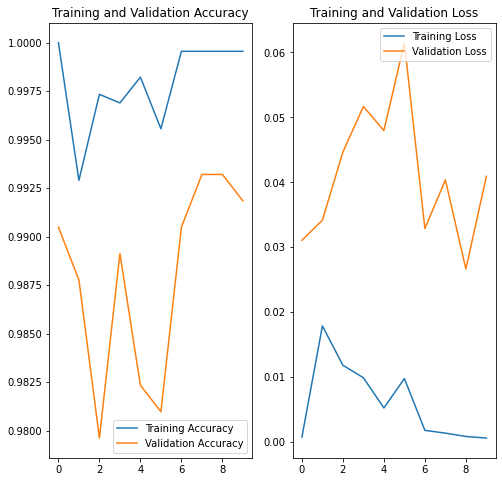

Epoch 1/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0398 - val_accuracy: 0.9932
Epoch 2/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0019 - accuracy: 0.9991 - val_loss: 0.0421 - val_accuracy: 0.9932
Epoch 3/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0574 - val_accuracy: 0.9918
Epoch 4/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0246 - accuracy: 0.9925 - val_loss: 0.0857 - val_accuracy: 0.9633
Epoch 5/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0115 - accuracy: 0.9956 - val_loss: 0.0355 - val_accuracy: 0.9851
Epoch 6/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0056 - accuracy: 0.9973 - val_loss: 0.9098 - val_accuracy: 0.7418
Epoch 7/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 0.0315 - val_accuracy: 0.9905
Epoch 8/10
71

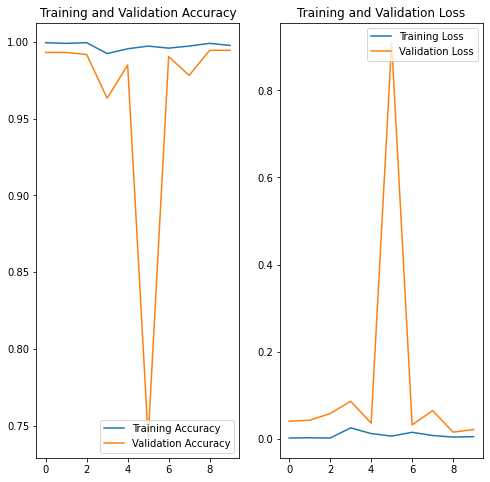

Epoch 1/10
71/71 [==============================] - 3s 46ms/step - loss: 8.3288e-04 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 0.9973
Epoch 2/10
71/71 [==============================] - 3s 45ms/step - loss: 5.4115e-04 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 0.9959
Epoch 3/10
71/71 [==============================] - 3s 45ms/step - loss: 7.6850e-04 - accuracy: 0.9996 - val_loss: 0.0184 - val_accuracy: 0.9959
Epoch 4/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0248 - val_accuracy: 0.9946
Epoch 5/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0053 - accuracy: 0.9969 - val_loss: 0.0568 - val_accuracy: 0.9851
Epoch 6/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0091 - accuracy: 0.9965 - val_loss: 0.0823 - val_accuracy: 0.9769
Epoch 7/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0106 - accuracy: 0.9973 - val_loss: 0.0325 - val_accuracy: 0.9891
E

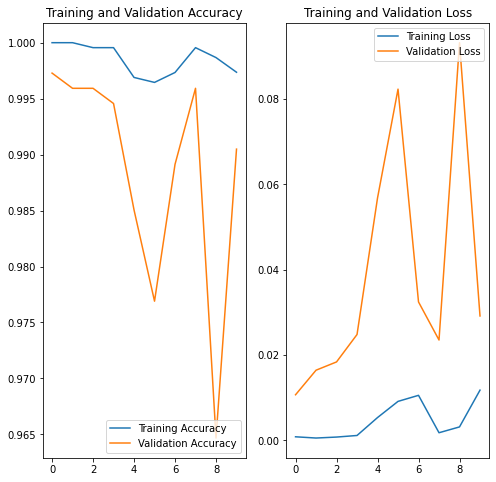

Epoch 1/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0952 - val_accuracy: 0.9715
Epoch 2/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0318 - val_accuracy: 0.9891
Epoch 3/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 0.0274 - val_accuracy: 0.9932
Epoch 4/10
71/71 [==============================] - 3s 46ms/step - loss: 8.3764e-04 - accuracy: 0.9996 - val_loss: 0.0362 - val_accuracy: 0.9918
Epoch 5/10
71/71 [==============================] - 3s 46ms/step - loss: 5.5036e-04 - accuracy: 0.9996 - val_loss: 0.0365 - val_accuracy: 0.9918
Epoch 6/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0371 - val_accuracy: 0.9878
Epoch 7/10
71/71 [==============================] - 3s 46ms/step - loss: 8.1129e-04 - accuracy: 0.9996 - val_loss: 0.0301 - val_accuracy: 0.9905
E

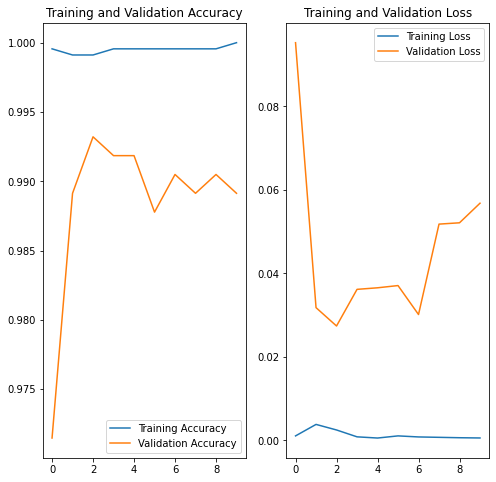

Epoch 1/10
71/71 [==============================] - 3s 46ms/step - loss: 3.5739e-04 - accuracy: 1.0000 - val_loss: 0.0599 - val_accuracy: 0.9891
Epoch 2/10
71/71 [==============================] - 3s 45ms/step - loss: 2.2447e-04 - accuracy: 1.0000 - val_loss: 0.0603 - val_accuracy: 0.9905
Epoch 3/10
71/71 [==============================] - 3s 46ms/step - loss: 1.0168e-04 - accuracy: 1.0000 - val_loss: 0.0686 - val_accuracy: 0.9891
Epoch 4/10
71/71 [==============================] - 3s 45ms/step - loss: 1.3936e-04 - accuracy: 1.0000 - val_loss: 0.0754 - val_accuracy: 0.9878
Epoch 5/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0236 - accuracy: 0.9942 - val_loss: 0.2542 - val_accuracy: 0.9878
Epoch 6/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.0633 - val_accuracy: 0.9864
Epoch 7/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0104 - accuracy: 0.9960 - val_loss: 0.0895 - val_accuracy: 0.98

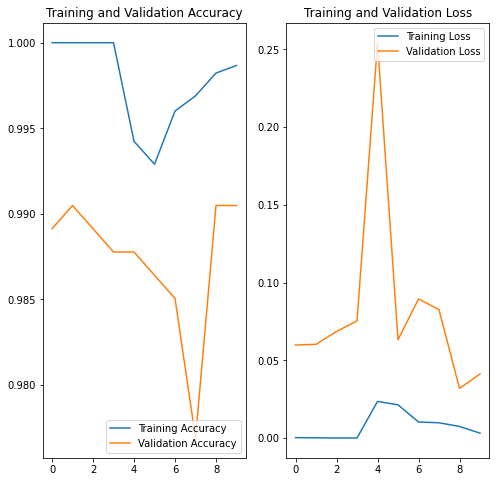

Epoch 1/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.0234 - val_accuracy: 0.9891
Epoch 2/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0082 - accuracy: 0.9969 - val_loss: 0.0219 - val_accuracy: 0.9905
Epoch 3/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0017 - accuracy: 0.9991 - val_loss: 0.0266 - val_accuracy: 0.9878
Epoch 4/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0020 - accuracy: 0.9991 - val_loss: 0.0182 - val_accuracy: 0.9905
Epoch 5/10
71/71 [==============================] - 3s 45ms/step - loss: 7.2338e-04 - accuracy: 0.9996 - val_loss: 0.0148 - val_accuracy: 0.9905
Epoch 6/10
71/71 [==============================] - 3s 46ms/step - loss: 6.6538e-04 - accuracy: 0.9996 - val_loss: 0.0180 - val_accuracy: 0.9959
Epoch 7/10
71/71 [==============================] - 3s 45ms/step - loss: 4.4994e-04 - accuracy: 1.0000 - val_loss: 0.0194 - val_accuracy: 0.9946
E

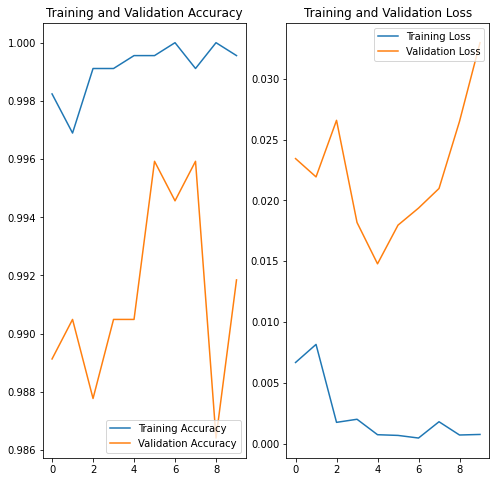

Epoch 1/10
71/71 [==============================] - 3s 46ms/step - loss: 9.9318e-04 - accuracy: 0.9996 - val_loss: 0.0696 - val_accuracy: 0.9918
Epoch 2/10
71/71 [==============================] - 3s 45ms/step - loss: 5.2669e-04 - accuracy: 0.9996 - val_loss: 0.0499 - val_accuracy: 0.9932
Epoch 3/10
71/71 [==============================] - 3s 46ms/step - loss: 3.5939e-04 - accuracy: 1.0000 - val_loss: 0.0288 - val_accuracy: 0.9946
Epoch 4/10
71/71 [==============================] - 3s 46ms/step - loss: 1.1836e-04 - accuracy: 1.0000 - val_loss: 0.0528 - val_accuracy: 0.9905
Epoch 5/10
71/71 [==============================] - 3s 45ms/step - loss: 1.0583e-04 - accuracy: 1.0000 - val_loss: 0.0503 - val_accuracy: 0.9905
Epoch 6/10
71/71 [==============================] - 3s 46ms/step - loss: 1.8133e-04 - accuracy: 1.0000 - val_loss: 0.0483 - val_accuracy: 0.9918
Epoch 7/10
71/71 [==============================] - 3s 46ms/step - loss: 5.6262e-04 - accuracy: 0.9996 - val_loss: 0.0918 - val_ac

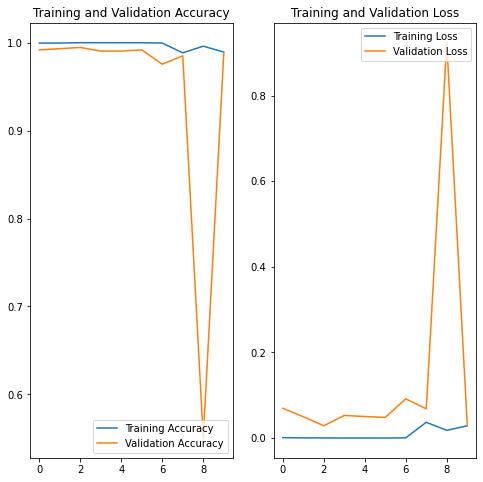

Epoch 1/10
71/71 [==============================] - 3s 47ms/step - loss: 0.0071 - accuracy: 0.9969 - val_loss: 0.1011 - val_accuracy: 0.9620
Epoch 2/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0077 - accuracy: 0.9973 - val_loss: 0.0563 - val_accuracy: 0.9851
Epoch 3/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0044 - accuracy: 0.9982 - val_loss: 0.0431 - val_accuracy: 0.9878
Epoch 4/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0017 - accuracy: 0.9991 - val_loss: 0.0490 - val_accuracy: 0.9878
Epoch 5/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0537 - val_accuracy: 0.9891
Epoch 6/10
71/71 [==============================] - 3s 45ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0373 - val_accuracy: 0.9932
Epoch 7/10
71/71 [==============================] - 3s 46ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 0.0178 - val_accuracy: 0.9918
Epoch 8/10
71

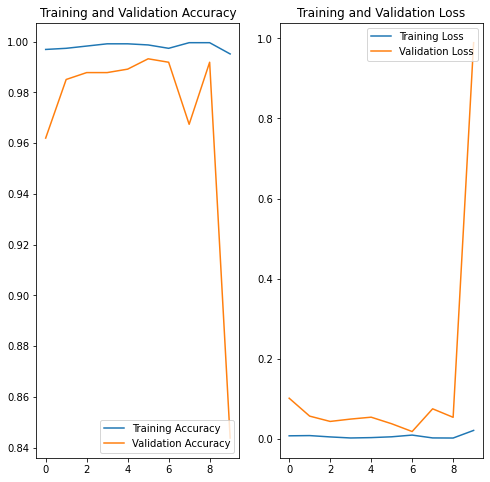

36.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [217]:
%%timeit -r 1 -n 10


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

sample_pred_images, _ = next(predict_data_gen)

list_ = sorted(os.listdir(path_data+'natural_img/natural'))[2:]
# len(list_)
# model = tf.keras.models.load_model('../data/weight/resnet50.h5')

pred = model.predict(sample_pred_images, batch_size=None, verbose=0, steps=None)

preds = [0 if pred_ < 0.5 else 1 for pred_ in pred]

preds = np.vstack((list_, preds))

dic_pred = dict([(fname, int(pred)) for fname, pred in zip(preds[0,:], preds[1,:])])

import pandas as pd
df = pd.read_csv('../data/flower_natural_with_label2.csv')
# df['label_'] = [0 if label == 'r' else 1 for label in df['label']]
# df.to_csv('../data/flower_natural_with_label2.csv',index = False)

dic_label = dict([(fname, label) for fname, label in zip(df['fname'], df['label_'])])

l = []
cnt = 0
for fname in df['fname']:
    if dic_label[fname] != '-':
        cnt += 1
        l.append(dic_pred[fname] == dic_label[fname])
# print(l.count(True), cnt)
with open('../data/result_natural(acc).txt', mode='a') as f:
        f.write(str(1 - (l.count(True)/ cnt)) + ',')

In [228]:
%precision 3

'%.3f'

In [235]:
print(np.array(pd.read_csv('../data/result_natural(acc).txt', header = None).T[0][:-1]).mean())
print(np.array(pd.read_csv('../data/result_natural(acc).txt', header = None).T[0][:-1]).max())
print(np.array(pd.read_csv('../data/result_natural2(acc).txt', header = None).T[0][:-1]).mean())
print(np.array(pd.read_csv('../data/result_natural2(acc).txt', header = None).T[0][:-1]).max())

0.7081166772352568
0.7400126823081801
0.7176284083703234
0.7799619530754598


In [230]:
print(np.array(pd.read_csv('../github/MAML-Pytorch_copy3/data/result_natural(acc).txt', header = None).T[0][:-1]).mean())
print(np.array(pd.read_csv('../github/MAML-Pytorch_copy3/data/result_natural(acc).txt', header = None).T[0][:-1]).max())
print(np.array(pd.read_csv('../github/MAML-Pytorch_copy3/data/result_natural2(acc).txt', header = None).T[0][:-1]).mean())
print(np.array(pd.read_csv('../github/MAML-Pytorch_copy3/data/result_natural2(acc).txt', header = None).T[0][:-1]).max())

0.6846544071020926
0.7266962587190868
0.735003170577045
0.7590361445783133


In [48]:
pred.shape[0] -1636

1636

In [50]:
pd.DataFrame(pred).T.to_csv('../data/pred_resnet50_natural_prob.csv', header=False, index=False)

In [106]:
from PIL import Image
for i, bool_ in zip(np.arange(len(pred)), pred):
    img = np.array(sample_pred_images[i]*255, np.uint8)
    if bool_:
        Image.fromarray(img).save('../data/dataset/pred/right/'+str(i)+'.png')
    else:
        Image.fromarray(img).save('../data/dataset/pred/left/'+str(i)+'.png')

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [80]:
sample_train_images, _ = next(train_data_gen)

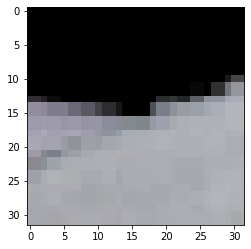

In [92]:
img = np.array(sample_train_images[1]*255, np.uint8)

plt.imshow(img)

In [85]:
pred = model.predict(sample_train_images, batch_size=None, verbose=0, steps=None) > 0.5

In [90]:
pred[:10]

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True]])

In [163]:
df_ = pd.read_csv('../data/pred_resnet50_natural2.csv', header = None)
preds__ = [1 if bl else 0 for bl in pred_res2[2]]
fnames__ = list(df_[0])

In [164]:
preds__ = np.vstack((list_, preds__))
preds__.shape

(2, 1636)

In [165]:
dic_pred__ = dict([(fname, int(pred)) for fname, pred in zip(preds[0,:], preds[1,:])])

In [153]:
import pandas as pd
pred_res1 = pd.read_csv('../data/pred_resnet50_natural_prob.csv', header = None)
pred_res2 = pd.read_csv('../data/pred_resnet50_natural2_prob.csv', header = None)

pred_res1[2] = (pred_res1[1] > 0.5)
pred_res2[2] = (pred_res2[1] > 0.5)

In [162]:
pred_res2

,0,1,2
0,0_0.png,0.425173,False
1,0_1.png,0.999995,True
2,0_2.png,0.000128,False
3,0_3.png,0.999990,True
4,0_4.png,0.999998,True
...,...,...,...
1631,9_2.png,0.999655,True
1632,9_3.png,0.001489,False
1633,9_4.png,0.093181,False
1634,9_5.png,0.000064,False


In [168]:
dic_res1 = dict([(key, 0) if value == False else (key, 1) for key, value in zip(pred_res1[0], pred_res1[2])])
dic_res2 = dict([(key, 0) if value == False else (key, 1) for key, value in zip(pred_res2[0], pred_res2[2])])

In [168]:
dic_res1 = dict([(key, 0) if value == False else (key, 1) for key, value in zip(pred_res1[0], pred_res1[2])])
dic_res2 = dict([(key, 0) if value == False else (key, 1) for key, value in zip(pred_res2[0], pred_res2[2])])

In [174]:
preds = pred > 0.5
dic_pred = dict([(key, 0) if value == False else (key, 1) for key, value in zip(pred_res1[0], preds)])

In [173]:
preds

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])